**MICROSOFT MOVIE STUDIO MARKET ANALYSIS**

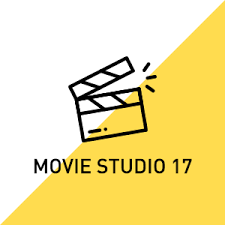


**OVERVIEW**

This project analyses the market environment for the Microsoft to widen their understanding of the movie production market. This exploratory data analysis generates insights on the movie production business focusing on the relationship of genres on revenue generation and the market competition. Microsoft can use this analysis to understand the type of movies to focus on during production, the market competition, and The average movie runtime as they start production.

**BUSINESS PROBLEM**

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies.What types of films are currently doing the best at the box office. Translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

**DATA UNDERSTANDING**

The data source is from IMDB Web site that provides information about millions of films and television programs.IMDB data goes through consistency checks to ensure it's as accurate and reliable as possible.This data will help Microsoft to get the type of movies and the likely turnover.

In [85]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
%matplotlib inline


In [3]:
#loading the data in a pandas dataframe
dfgross_income = pd.read_csv('bom.movie_gross.csv')

#checking the display of the first 5 rows
dfgross_income.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
dfgross_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


From the Info(), the data type is object for the column foreign_gross but from the dataframe it is in numerical form hence the need to change the data type.The year also should be in datetime data type

In [5]:
#using the function pd.to_datetime 
dfgross_income['year']=pd.to_datetime(dfgross_income['year'],format='%Y')

'''The errors = 'coerce', which forces any value in the "foreign_gross"  cannot be converted to a numeric type, it will be replaced with NaN'''
dfgross_income['foreign_gross']= pd.to_numeric(dfgross_income['foreign_gross'], errors='coerce')

In [6]:
#calling the info to confirm change of data type
dfgross_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           3387 non-null   object        
 1   studio          3382 non-null   object        
 2   domestic_gross  3359 non-null   float64       
 3   foreign_gross   2032 non-null   float64       
 4   year            3387 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 132.4+ KB


In [7]:
#checking if the data has missing data
dfgross_income.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1355
year                 0
dtype: int64

The data shows 1355 values are missing in the foreign_gross,28 for domestic_gross and 5 studio.
To fill studio we will use mode
for the domestic we will use mean
for the foreign will drop because 45% of the data is missing

<h1 style="font-size: 24px;">DATA CLEANING, 'movie_gross.csv'</h1>

In [8]:
#for the studio
dfgross_income['studio']=dfgross_income['studio'].fillna('Missing')
# for the domestic gross use median
domesitic_median = dfgross_income['domestic_gross'].median()
dfgross_income['domestic_gross'].fillna(domesitic_median, inplace=True)

dfgross_income=dfgross_income.drop(['foreign_gross'], axis=1)

In [9]:
#just to recheck if there is any more missing data
dfgross_income.isnull().sum()

title             0
studio            0
domestic_gross    0
year              0
dtype: int64

In [10]:
dfgross_income

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010-01-01
1,Alice in Wonderland (2010),BV,334200000.0,2010-01-01
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010-01-01
3,Inception,WB,292600000.0,2010-01-01
4,Shrek Forever After,P/DW,238700000.0,2010-01-01
...,...,...,...,...
3382,The Quake,Magn.,6200.0,2018-01-01
3383,Edward II (2018 re-release),FM,4800.0,2018-01-01
3384,El Pacto,Sony,2500.0,2018-01-01
3385,The Swan,Synergetic,2400.0,2018-01-01


<h1 style="font-size: 24px;">Loading and cleaning the, 'movie_basics.csv'</h1> 

In [11]:
#loading data into a pandas dataframe
dfbasics = pd.read_csv('title.basics.csv')
dfbasics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [12]:
#to get an overview of the data
dfbasics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [13]:
#changing the data type of date
dfbasics['start_year']=pd.to_datetime(dfbasics['start_year'],format='%Y')


In [14]:
#checking if they any missing values
dfbasics.isnull().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

<h1 style="font-size: 24px;">Data Reengineering</h1>

In [15]:
#getting the summary statistics of the column runtime
dfbasics.describe()

,runtime_minutes
count,114405.000000
mean,86.187247
std,166.360590
min,1.000000
25%,70.000000
50%,87.000000
75%,99.000000
max,51420.000000


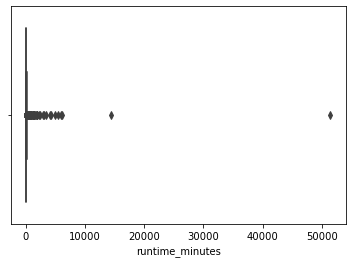

In [18]:
# Create a box plot
# and you want to create a box plot for the 'runtime_minutes' column
sns.boxplot(data=dfbasics, x='runtime_minutes')

# Show the plot
plt.show()

The median is less sensitive to extreme values or outliers in the data,the mean can be heavily influenced by outliers and may not accurately represent the data

In [22]:
#using the median to fill the missing data in runtime minutes
runtime_minutes_median = dfbasics['runtime_minutes'].median()
dfbasics['runtime_minutes'].fillna(runtime_minutes_median, inplace=True)

#for the genre columns will use missing
dfbasics['genres']=dfbasics['genres'].fillna('Missing')

#dropping the original title because its a duplicate
dfbasics=dfbasics.drop(['original_title'], axis=1)



In [23]:
#rechecking if there is any missing values
dfbasics.isnull().sum()

tconst             0
primary_title      0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [24]:
dfbasics.head()

,tconst,primary_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013-01-01,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019-01-01,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018-01-01,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018-01-01,87.0,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017-01-01,80.0,"Comedy,Drama,Fantasy"


<h1 style="font-size: 24px;">Loading and cleaning, 'movie_ratings.csv'</h1>

In [25]:
#loading the data into a data frame
dfratings = pd.read_csv('title.ratings.csv')
dfratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [26]:
#checking some summary of the data
dfratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [28]:
dfratings.isnull().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

In [27]:
dfratings.describe()


,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


The data set does not have missing values and and have check simple summary statistics

<h1 style="font-size: 24px;">MERGING OF THE DATA SETS</h1>

In [29]:
#joining the basics and ratings based on the common column
dfjoinedbasicsratings = pd.merge(dfbasics,dfratings, on = 'tconst',how='inner')

#joining with the gross using title
main_dataset = dfjoinedbasicsratings.merge(dfgross_income, left_on='primary_title', right_on='title', how='inner')


In [32]:
main_dataset = main_dataset.drop(['title','year'], axis=1)
main_dataset.head()

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross
0,tt0315642,Wazir,2016-01-01,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0
1,tt0337692,On the Road,2012-01-01,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0
2,tt4339118,On the Road,2014-01-01,89.0,Drama,6.0,6,IFC,744000.0
3,tt5647250,On the Road,2016-01-01,121.0,Drama,5.7,127,IFC,744000.0
4,tt0359950,The Secret Life of Walter Mitty,2013-01-01,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0


In [33]:
main_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3026
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   tconst           3027 non-null   object        
 1   primary_title    3027 non-null   object        
 2   start_year       3027 non-null   datetime64[ns]
 3   runtime_minutes  3027 non-null   float64       
 4   genres           3027 non-null   object        
 5   averagerating    3027 non-null   float64       
 6   numvotes         3027 non-null   int64         
 7   studio           3027 non-null   object        
 8   domestic_gross   3027 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 236.5+ KB


<h1 style="font-size: 24px;">MAIN DATA ANALYSIS </h1>

In [34]:
main_dataset.describe()

,runtime_minutes,averagerating,numvotes,domestic_gross
count,3027.000000,3027.000000,3.027000e+03,3.027000e+03
mean,106.903204,6.457582,6.170030e+04,3.042782e+07
std,20.073663,1.012277,1.255132e+05,6.651972e+07
min,3.000000,1.600000,5.000000e+00,1.000000e+02
25%,93.000000,5.900000,2.117000e+03,1.445000e+05
50%,104.000000,6.600000,1.310900e+04,1.900000e+06
75%,118.000000,7.100000,6.276550e+04,3.210000e+07
max,272.000000,9.200000,1.841066e+06,7.001000e+08


<h1 style="font-size: 24px;">Q1. Which type of movie generates most revenue?</h1>

In [38]:
grouped_genre = main_dataset.groupby('genres')[['averagerating', 'domestic_gross']].sum()
grouped_genre

,averagerating,domestic_gross
genres,,
Action,110.1,1.858607e+08
"Action,Adventure",35.2,3.245000e+05
"Action,Adventure,Animation",161.8,2.184660e+09
"Action,Adventure,Biography",28.0,2.402290e+08
"Action,Adventure,Comedy",200.7,3.172472e+09
...,...,...
"Romance,Thriller",11.7,5.473000e+05
Sci-Fi,10.1,4.126780e+08
Sport,7.9,5.300000e+06


In [80]:
#using the top ten to know which genre has high returns
grouped_genredg = grouped_genre.sort_values(by='domestic_gross', ascending=False)

top10dg=grouped_genredg.head(10)


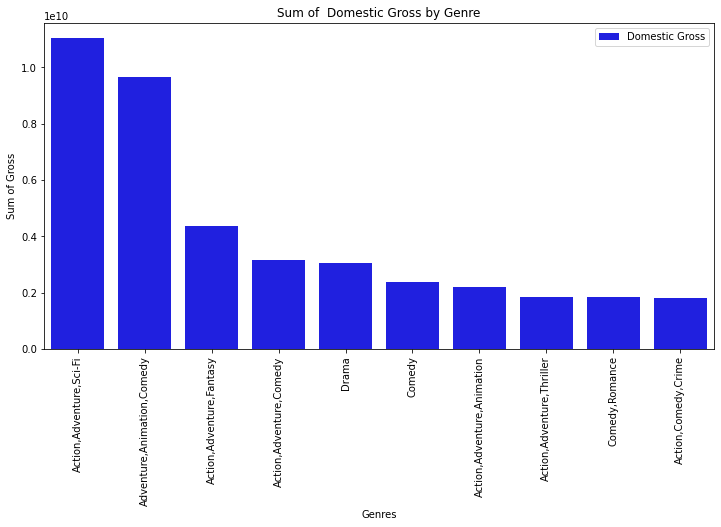

In [81]:
plt.figure(figsize=(12, 6))  # Set the figure size (optional)

# Plot the grouped data
sns.barplot(x=top10dg.index, y='domestic_gross', data=top10dg, label='Domestic Gross',color='blue')

# Customize the plot
plt.xlabel('Genres')
plt.ylabel('Sum of Gross')
plt.title('Sum of  Domestic Gross by Genre')
plt.xticks(rotation=90) 
plt.legend()

# Show the plot
plt.show()

The genre which has combined Action,Adventure and Sci fi had the highest return in terms of gross return,followed closely by Animation comedy.This is clearly showing the movie market that sells.

<h1 style="font-size: 24px;">Q2. Which type movie has high average rating</h1>

In [78]:
#To find out which is the most popular genre by using ratings
grouped_genresort = grouped_genre.sort_values(by=['averagerating'], ascending=False)
top10rating=grouped_genresort.head(10)
top10rating

,averagerating,domestic_gross
genres,,
Drama,2115.3,3.049094e+09
"Comedy,Drama",876.3,1.731282e+09
"Comedy,Drama,Romance",838.2,1.673457e+09
Documentary,793.6,1.698565e+09
"Drama,Romance",743.8,1.048307e+09
Comedy,550.4,2.359043e+09
"Adventure,Animation,Comedy",482.9,9.645133e+09
"Comedy,Romance",437.8,1.848823e+09
"Drama,Thriller",348.0,8.291860e+08


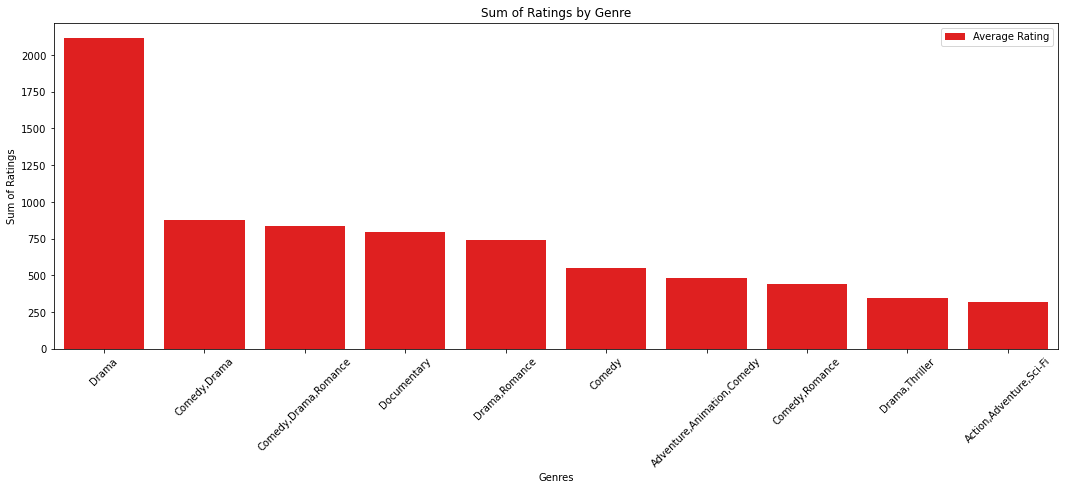

In [84]:
plt.figure(figsize=(18, 6))  # Set the figure size (optional)

# Plot the grouped data
sns.barplot(x=top10rating.index, y='averagerating', data=top10rating, label='Average Rating', color='red')


# Customize the plot
plt.xlabel('Genres')
plt.ylabel('Sum of Ratings')
plt.title('Sum of Ratings by Genre')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()

# Show the plot
plt.show()

The type of movie with the most ratings is drama.This shows the market rating from the viewers- which could translate to the viewership of the studio and the algorithim hence high recommendations to view.

<h1 style="font-size: 24px;">Q3 Which studio has the most production of movies and which studio has high rating</h1>

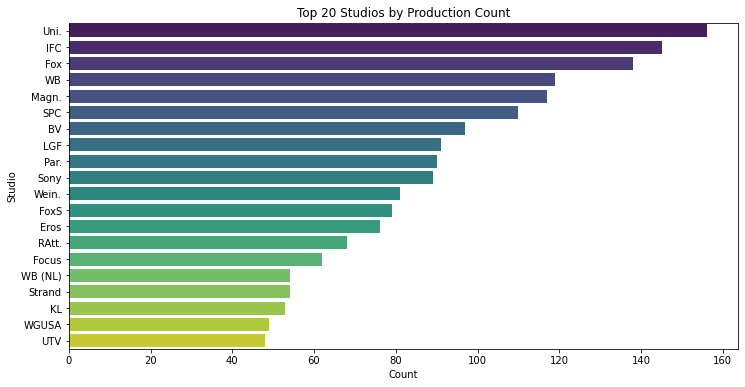

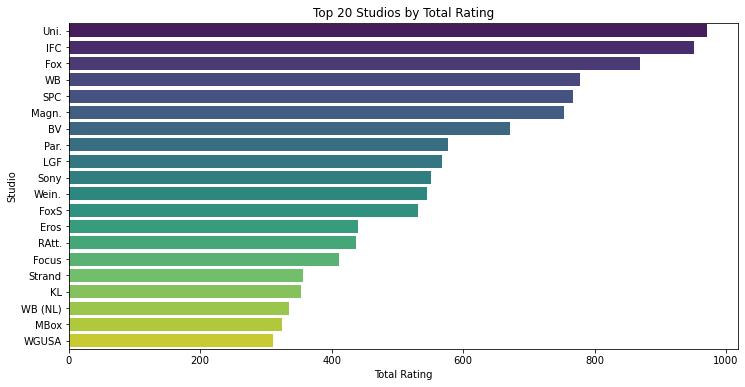

In [114]:
# Assuming you have a DataFrame named main_dataset
name_studios = main_dataset['studio']

# Getting the number of productions for each studio
num_studio = name_studios.value_counts()

# Grouping by studio and calculating the sum of 'averagerating'
studios_stats = main_dataset.groupby('studio')[['averagerating']].sum()

# Merging the grouped data and the number of productions
combined_studio = pd.concat([num_studio, studios_stats], axis=1)
combined_studio.columns = ['count', 'rating']

# Sorting the DataFrame by production count in descending order
combined_studio = combined_studio.sort_values(by='count', ascending=False)

# Create a bar plot for the top 20 studios by production count
top_20_by_count = combined_studio.head(20)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_20_by_count, x='count', y=top_20_by_count.index, palette='viridis')
plt.title('Top 20 Studios by Production Count')
plt.xlabel('Count')
plt.ylabel('Studio')
plt.show()

# Sorting the DataFrame by total rating in descending order
combined_studio = combined_studio.sort_values(by='rating', ascending=False)

# Create a bar plot for the top 20 studios by total rating
top_20_by_rating = combined_studio.head(20)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_20_by_rating, x='rating', y=top_20_by_rating.index, palette='viridis')
plt.title('Top 20 Studios by Total Rating')
plt.xlabel('Total Rating')
plt.ylabel('Studio')
plt.show()






There is a positive correlation of productions and and the ratings.The above graph shows the studio with the most productions has the most ratings.This is a clear picture of the studio that is dominating the market having the most productions hence the high viewership.

<h1 style="font-size: 24px;">Q4.What is the average running time per studio?</h1>

In order for the manager to make decisions they will need to know when editing the movie the ideal time to run.

In [132]:

top_20_studios = combined_studio.nlargest(20, 'count').index

# Filter the dataset to include only the movies produced by the top 20 studios
top_20_studios_movies = main_dataset[main_dataset['studio'].isin(top_20_studios)]

# Calculate the average runtime of movies for each of the top 20 studios
average_runtimes = top_20_studios_movies.groupby('studio')['runtime_minutes'].mean().reset_index()
#Display 
average_runtimes

,studio,runtime_minutes
0,BV,110.092784
1,Eros,136.092105
2,Focus,107.790323
3,Fox,106.942029
4,FoxS,104.493671
5,IFC,102.275862
6,KL,103.679245
7,LGF,103.219780
8,MBox,107.895833
9,Magn.,101.692308


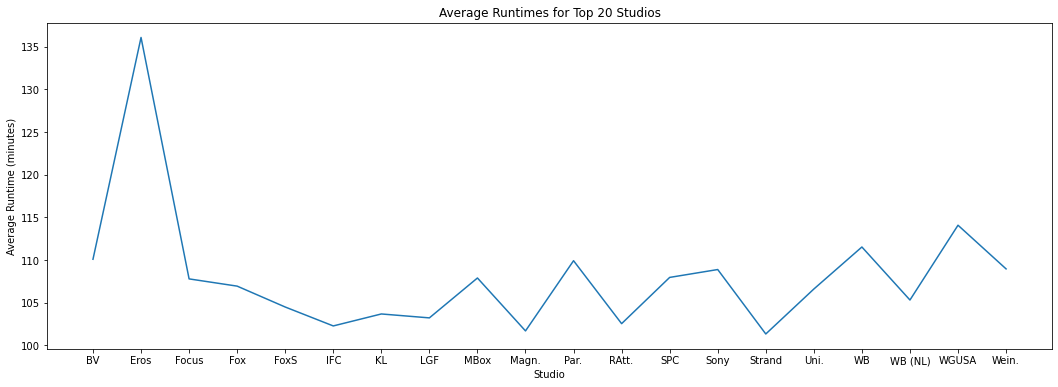

In [126]:
#creating a plot
plt.figure(figsize=(18, 6))
sns.lineplot(x='studio', y='runtime_minutes', data=average_runtimes, palette='viridis')
plt.title('Average Runtimes for Top 20 Studios')
plt.xlabel('Studio')
plt.ylabel('Average Runtime (minutes)')
plt.show()

The range for runtime of a movie is as the mean show of 106minutes with an upper quantile of 118 minutes.

<h1 style="font-size: 24px;">Q5 Which studios are the top performers in terms of revenue?</h1>

In [153]:
studio_revenue = main_dataset.groupby('studio')['domestic_gross'].sum().reset_index()

# Sort the DataFrame by domestic gross revenue in descending order to find the top performers
top_performing_studios = studio_revenue.nlargest(10, 'domestic_gross')
top_performing_studios

,studio,domestic_gross
32,BV,1.699830e+10
199,Uni.,1.379140e+10
81,Fox,1.095530e+10
207,WB,1.068610e+10
155,Par.,7.402813e+09
182,Sony,6.992557e+09
208,WB (NL),4.535100e+09
114,LGF,3.704750e+09
145,P/DW,1.682900e+09
212,Wein.,1.673979e+09


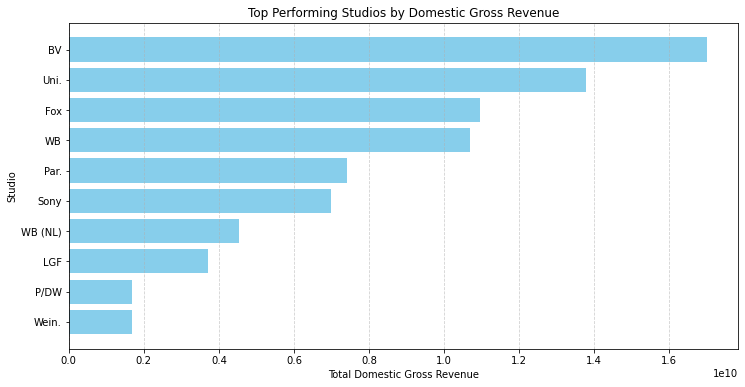

In [154]:
studio_revenue = main_dataset.groupby('studio')['domestic_gross'].sum().reset_index()

# Sort the DataFrame by domestic gross revenue in descending order to find the top performers
top_performing_studios = studio_revenue.nlargest(10, 'domestic_gross')

# Create a bar plot to visualize the top-performing studios
plt.figure(figsize=(12, 6))
plt.barh(top_performing_studios['studio'], top_performing_studios['domestic_gross'], color='skyblue')
plt.title('Top Performing Studios by Domestic Gross Revenue')
plt.xlabel('Total Domestic Gross Revenue')
plt.ylabel('Studio')
plt.gca().invert_yaxis()  # Invert the y-axis for the highest revenue at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

The top performers in revenue are BV and Uni Studio.The most productions are from Uni studios.The studios with high yield in revenue do not have the most production this could translate to the good quality of movies they may be producing making the sales and the genre that they produce.

<h1 style="font-size: 24px;">Q6 Which Genre does the top revenue earner produce?</h1>

In [155]:
# Group the data by studio and calculate the total domestic gross revenue for each studio
studio_revenue = main_dataset.groupby('studio')['domestic_gross'].sum().reset_index()

# Find the studio with the highest total domestic gross revenue
top_studio = studio_revenue.nlargest(1, 'domestic_gross')['studio'].values[0]

# Filter the data to include only the movies produced by the top studio
top_studio_movies = main_dataset[main_dataset['studio'] == top_studio]

# Identify the genres produced by the top studio
top_studio_genres = top_studio_movies['genres'].unique()

# Display the results
print(f"The studio with the highest total domestic gross revenue is: {top_studio}")
print(f"The genres produced by this studio are: {', '.join(top_studio_genres)}")

The studio with the highest total domestic gross revenue is: BV
The genres produced by this studio are: Adventure,Animation,Comedy, Action,Adventure,Sci-Fi, Action,Drama,Family, Biography,Drama,History, Action,Adventure,Fantasy, Action,Adventure,Comedy, Action,Adventure,Family, Biography,Drama,Family, Animation,Comedy,Family, Comedy,Romance, Adventure,Comedy,Family, Action,Adventure,Western, Documentary, Adventure,Documentary, Drama,Music,Romance, Adventure,Animation,Family, Adventure,Drama,Sport, Fantasy,Romance, Comedy,Family,Romance, Drama, Comedy,Drama,Family, Drama,History,War, Adventure,Family,Fantasy, Crime,Drama, Family, Biography,Documentary,History, Biography,Drama,Sport, Comedy,Family, Comedy,Drama, Biography,Drama,Thriller, Animation,Biography,Drama, Action,Drama,History, Biography,Comedy,Drama, Adventure,Comedy,Drama, Comedy,Musical, Thriller, Action,Adventure,Animation, Adventure,Comedy,Crime, Action,Crime,Thriller, Horror, Drama,Romance, Drama,History,Thriller, Comedy,Fa

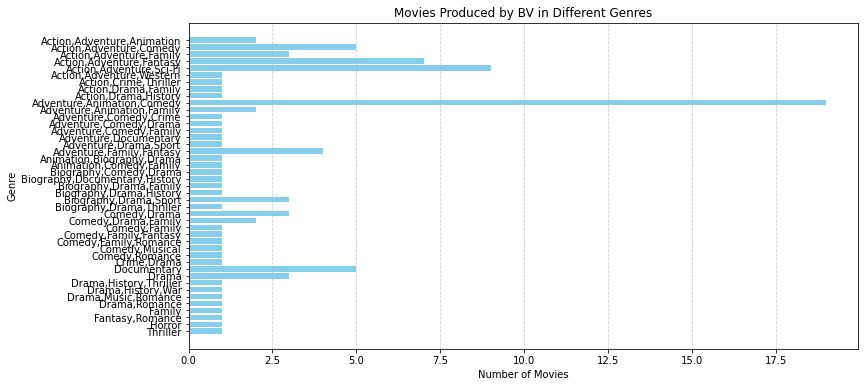

In [157]:
# Step 1: Identify the top-performing studio (e.g., the studio with the highest domestic gross)
top_studio = main_dataset.groupby('studio')['domestic_gross'].sum().idxmax()

# Step 2: Filter the data for the top-performing studio
top_studio_data = main_dataset[main_dataset['studio'] == top_studio]

# Step 3: Group the data by genre and calculate the number of movies in each genre
genre_performance = top_studio_data.groupby('genres')['domestic_gross'].count().reset_index()

# Step 4: Create a DataFrame
genre_performance_df = pd.DataFrame({'Genres': genre_performance['genres'], 'Movie Count': genre_performance['domestic_gross']})

# Step 5: Plot the data
plt.figure(figsize=(12, 6))
plt.barh(genre_performance_df['Genres'], genre_performance_df['Movie Count'], color='skyblue')
plt.title(f'Movies Produced by {top_studio} in Different Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

The studio with the highest revenue produced the most popular genres.The genres produced by this studio are: Adventure,Animation,Comedy, Action,Adventure,Sci-Fi, Action,Drama,Family, Biography,Drama,History, Action,Adventure,Fantasy, Action,Adventure,Comedy, Action,Adventure,Family are just some that they produce.

<h1 style="font-size: 24px;">Q7 What has been the trend of revenue for the past 5years?</h1>

In [150]:
# Filter the dataset for movies released before 2020
end_year = '2020-01-01'
year_data = main_dataset[main_dataset['start_year'] < end_year]

# Get the list of the top 10 studios in terms of domestic gross revenue
top_10_studios = year_data.groupby('studio')['domestic_gross'].sum().nlargest(10).index

# Filter the data to include only the top 10 studios
year_data = year_data[year_data['studio'].isin(top_10_studios)]

# Group the data by studio and year, and calculate the total domestic gross revenue for each studio-year combination
studio_year_revenue = year_data.groupby(['studio', 'start_year'])['domestic_gross'].sum().reset_index()

studio_year_revenue

,studio,start_year,domestic_gross
0,BV,2010-01-01,1.783900e+09
1,BV,2011-01-01,1.826000e+09
2,BV,2012-01-01,9.386000e+08
3,BV,2013-01-01,1.943200e+09
4,BV,2014-01-01,1.594300e+09
...,...,...,...
84,Wein.,2015-01-01,2.468560e+08
85,Wein.,2016-01-01,1.015167e+08
86,Wein.,2017-01-01,4.350000e+07
87,Wein.,2018-01-01,7.216700e+06


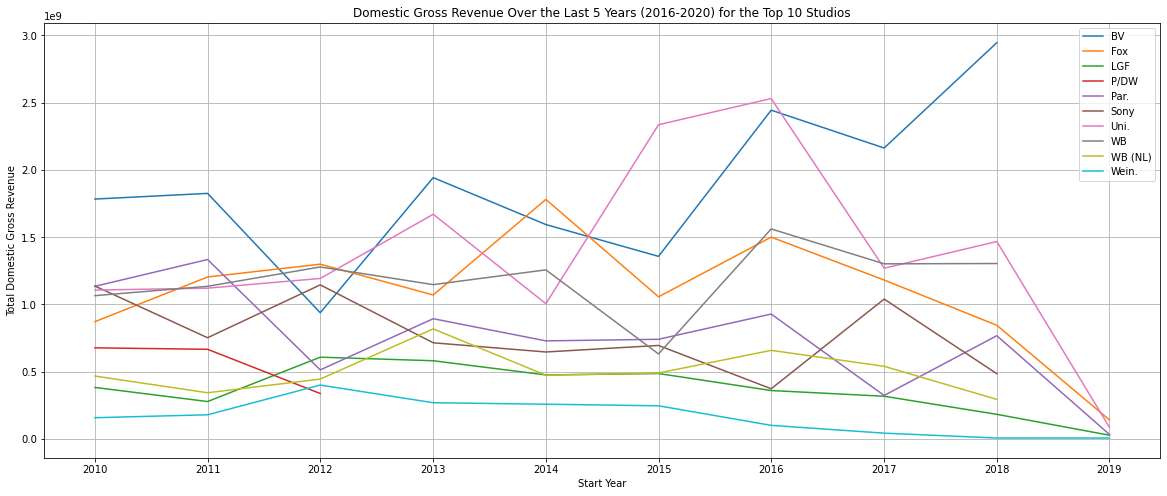

In [148]:
# Filter the dataset for movies released before 2020
end_year = '2020-01-01'
year_data = main_dataset[main_dataset['start_year'] < end_year]

# Get the list of the top 10 studios in terms of domestic gross revenue
top_10_studios = year_data.groupby('studio')['domestic_gross'].sum().nlargest(10).index

# Filter the data to include only the top 10 studios
year_data = year_data[year_data['studio'].isin(top_10_studios)]

# Group the data by studio and year, and calculate the total domestic gross revenue for each studio-year combination
studio_year_revenue = year_data.groupby(['studio', 'start_year'])['domestic_gross'].sum().reset_index()

# Pivot the data to create a table with studios as rows, years as columns, and revenue as values
pivot_table = studio_year_revenue.pivot(index='studio', columns='start_year', values='domestic_gross')

# Visualize the performance of each studio over the last five years using a line plot
plt.figure(figsize=(20, 8))
for studio in pivot_table.index:
    plt.plot(pivot_table.columns, pivot_table.loc[studio], label=studio)
plt.title('Domestic Gross Revenue Over the Last 5 Years (2016-2020) for the Top 10 Studios')
plt.xlabel('Start Year')
plt.ylabel('Total Domestic Gross Revenue')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

For the year 2019 there has been a decline on the domestic gross revenue there is need to do more research on the market effects that could have caused the drop.

<h1 style="font-size: 24px;">RECOMMENDATIONS</h1>

1. Microsoft should look at BV studio for best practices since their revenue growth has been on upward trajectory and they also produce the most popular genres.They should also look at the uni studio which has the most productions.
2. Microsoft should produce movies that combined Action,Adventure and Sci fi had the highest return in terms of gross return,also the comedy animation is a key genre.
3. Microsoft while planning to produce the movies should have a plan of a run time of a mean of 106 minutes with the highest quantile being 118 minutes.
4. There is need for more research to be done to understand why the revenue has been declining in the past year.
